<h1 style="text-align:center;">Route Combination Regression</h1>

<p style="text-align:center;">Vincent Etherton -- SML312: Research Projects in Data Science</p>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
routes_df = pd.read_csv('./data/labeled_routes.csv')

no_std = pd.read_csv('./data/all_pos_no_std.csv')

df = pd.read_csv('./data/labeled_pos_data.csv')

In [49]:
routes_df.drop(columns=['Unnamed: 0'], inplace=True)
no_std.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
routes_df.head()

,gameId,playId,nflId,bezier_curve,final_pos,train_test_split,curve_cluster,position_cluster,cluster_label
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,"(5.840000000000003, -16.37)",train,8.0,0.0,8.0_0.0
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,"(14.009999999999998, -3.629999999999995)",train,9.0,5.0,9.0_5.0
2,2021090900,97,39985.0,[ 0.00000000e+00 0.00000000e+00 1.69959402e-...,"(0.7100000000000009, -8.12)",train,6.0,8.0,6.0_8.0
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,"(4.910000000000004, 16.790000000000003)",train,7.0,4.0,7.0_4.0
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,"(13.990000000000002, 14.600000000000003)",train,4.0,6.0,4.0_6.0


In [51]:
no_std.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,41233.0,6,2021-09-10T00:26:31.600,13.0,TB,right,-0.99,16.20,0.00,0.00,0.00,129.28,4.76,ball_snap
1,2021090900,97,41233.0,7,2021-09-10T00:26:31.700,13.0,TB,right,-0.98,16.21,0.00,0.00,0.01,129.28,23.29,NaN
2,2021090900,97,41233.0,8,2021-09-10T00:26:31.800,13.0,TB,right,-0.97,16.22,0.02,0.55,0.01,127.86,41.24,NaN
3,2021090900,97,41233.0,9,2021-09-10T00:26:31.900,13.0,TB,right,-0.95,16.23,0.27,2.93,0.02,125.97,61.85,NaN
4,2021090900,97,41233.0,10,2021-09-10T00:26:32.000,13.0,TB,right,-0.91,16.25,0.64,3.88,0.04,125.17,61.07,NaN


In [52]:
df.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,cluster_label,train_test_split,route
0,2021090900,97,41233.0,6,2021-09-10T00:26:31.600,13.0,TB,right,0.00,0.00,0.00,0.00,0.00,129.28,4.76,ball_snap,7.0_4.0,train,Slant
1,2021090900,97,41233.0,7,2021-09-10T00:26:31.700,13.0,TB,right,0.01,0.01,0.00,0.00,0.01,129.28,23.29,NaN,7.0_4.0,train,Slant
2,2021090900,97,41233.0,8,2021-09-10T00:26:31.800,13.0,TB,right,0.02,0.02,0.02,0.55,0.01,127.86,41.24,NaN,7.0_4.0,train,Slant
3,2021090900,97,41233.0,9,2021-09-10T00:26:31.900,13.0,TB,right,0.04,0.03,0.27,2.93,0.02,125.97,61.85,NaN,7.0_4.0,train,Slant
4,2021090900,97,41233.0,10,2021-09-10T00:26:32.000,13.0,TB,right,0.08,0.05,0.64,3.88,0.04,125.17,61.07,NaN,7.0_4.0,train,Slant


In [53]:
no_std['route'] = df['route']
no_std['cluster_label'] = df['cluster_label']

Let's ensure that the routes dataframe has the route labeled from our clustering model for each play in the dataset.

In [54]:
cluster_to_route = df.set_index('cluster_label')['route'].to_dict()
routes_df['route'] = routes_df['cluster_label'].map(cluster_to_route)
routes_df.drop(columns=['train_test_split','curve_cluster','cluster_label','position_cluster', 'final_pos'], inplace=True)

routes_df.head()

,gameId,playId,nflId,bezier_curve,route
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go
2,2021090900,97,39985.0,[ 0.00000000e+00 0.00000000e+00 1.69959402e-...,Flat
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post


To determine route combinations, one could take multiple approaches. The simplest one for now will be to determine the closest two routes in terms of their final y-position (horizontal field position) and then the second closest being the other route combination. In this way, the most important route combination is identified as this is the one that ends up on the same side of the field forcing the defender to make a difficult decision as to who to guard.

In [55]:
def calc_start_pos(combined_df, routes_df):
    start_positions = combined_df.groupby(['gameId', 'playId', 'nflId']).apply(
        lambda df: (df['x'].iloc[0], df['y'].iloc[0])
    ).reset_index(name='start_pos')
    
    routes_df = routes_df.merge(
        start_positions,
        on=['gameId', 'playId', 'nflId'],
        how='left'
    )
    
    return routes_df

def calc_end_pos(combined_df, routes_df):
    final_positions = combined_df.groupby(['gameId', 'playId', 'nflId']).apply(
        lambda df: (df['x'].iloc[-1], df['y'].iloc[-1])
    ).reset_index(name='final_pos')
    
    routes_df = routes_df.merge(
        final_positions,
        on=['gameId', 'playId', 'nflId'],
        how='left'
    )
    
    return routes_df

routes_df = calc_start_pos(no_std, routes_df)
routes_df = calc_end_pos(no_std, routes_df)

routes_df.head()

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_7817/230689000.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  start_positions = combined_df.groupby(['gameId', 'playId', 'nflId']).apply(
/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_7817/230689000.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_positions = combined_df.groupby(['gameId', 'playId', 'nflId']).apply(


,gameId,playId,nflId,bezier_curve,route,start_pos,final_pos
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel,"(-1.3500000000000014, 29.34)","(4.490000000000002, 45.71)"
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go,"(-1.9600000000000009, 36.77)","(12.049999999999995, 40.4)"
2,2021090900,97,39985.0,[ 0.00000000e+00 0.00000000e+00 1.69959402e-...,Flat,"(-5.450000000000003, 22.27)","(-4.740000000000002, 14.15)"
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant,"(-0.990000000000002, 16.2)","(3.9200000000000017, 32.99)"
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post,"(-2.8400000000000034, 35.09)","(11.15, 20.49)"


In [56]:
routes_df['start_x'] = routes_df['start_pos'].apply(lambda pos: pos[0])
routes_df['start_y'] = routes_df['start_pos'].apply(lambda pos: pos[1])

routes_df['end_x'] = routes_df['final_pos'].apply(lambda pos: pos[0])
routes_df['end_y'] = routes_df['final_pos'].apply(lambda pos: pos[1])

play_center = (
    routes_df.groupby(['gameId', 'playId'])['start_y']
    .agg(['max', 'min'])
    .reset_index()
)
play_center['play_center'] = play_center['max'] - play_center['min']
routes_df = routes_df.merge(play_center[['gameId', 'playId', 'play_center']], on=['gameId', 'playId'], how='left')

routes_df.head()

,gameId,playId,nflId,bezier_curve,route,start_pos,final_pos,start_x,start_y,end_x,end_y,play_center
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel,"(-1.3500000000000014, 29.34)","(4.490000000000002, 45.71)",-1.35,29.34,4.49,45.71,20.57
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go,"(-1.9600000000000009, 36.77)","(12.049999999999995, 40.4)",-1.96,36.77,12.05,40.40,20.57
2,2021090900,97,39985.0,[ 0.00000000e+00 0.00000000e+00 1.69959402e-...,Flat,"(-5.450000000000003, 22.27)","(-4.740000000000002, 14.15)",-5.45,22.27,-4.74,14.15,20.57
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant,"(-0.990000000000002, 16.2)","(3.9200000000000017, 32.99)",-0.99,16.20,3.92,32.99,20.57
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post,"(-2.8400000000000034, 35.09)","(11.15, 20.49)",-2.84,35.09,11.15,20.49,20.57


In [57]:
wr_df = routes_df[routes_df['start_x'] > -3.50]

wr_df.head()

,gameId,playId,nflId,bezier_curve,route,start_pos,final_pos,start_x,start_y,end_x,end_y,play_center
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel,"(-1.3500000000000014, 29.34)","(4.490000000000002, 45.71)",-1.35,29.34,4.49,45.71,20.57
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go,"(-1.9600000000000009, 36.77)","(12.049999999999995, 40.4)",-1.96,36.77,12.05,40.40,20.57
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant,"(-0.990000000000002, 16.2)","(3.9200000000000017, 32.99)",-0.99,16.20,3.92,32.99,20.57
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post,"(-2.8400000000000034, 35.09)","(11.15, 20.49)",-2.84,35.09,11.15,20.49,20.57
5,2021090900,137,42347.0,[ 0.00000000e+00 0.00000000e+00 1.93197947e-...,Go,"(-1.3700000000000043, 13.79)","(10.650000000000006, 8.83)",-1.37,13.79,10.65,8.83,36.61


In [58]:
from itertools import combinations

import pandas as pd
import numpy as np
from itertools import combinations

def find_combos(df):
    results = []

    for (gameId, playId), group in df.groupby(['gameId', 'playId']):
        final_positions = group['final_pos'].values
        routes = group['route'].values
        indices = list(range(len(routes)))  

        pairs = list(combinations(indices, 2))  
        
        distances = [
            abs(final_positions[i][1] - final_positions[j][1])  # only consider the y-coordinate (index 1)
            for i, j in pairs
        ]

        sorted_pairs = sorted(zip(distances, pairs), key=lambda x: x[0])
        assigned_indices = set()

        # assign the closest pairs iteratively
        for _, (i, j) in sorted_pairs:
            if i not in assigned_indices and j not in assigned_indices:
                # assign this pair as a combo
                route_combo = "-".join(sorted([routes[i], routes[j]]))
                results.append({'gameId': gameId, 'playId': playId, 'route_combo': route_combo})
                assigned_indices.update([i, j])

        # handle remaining routes
        remaining_indices = set(indices) - assigned_indices
        for idx in remaining_indices:
            results.append({'gameId': gameId, 'playId': playId, 'route_combo': routes[idx]})

    return pd.DataFrame(results)

route_combos_df = find_combos(wr_df)

print(route_combos_df)

route_combos_df[(route_combos_df['playId'] == 137) & (route_combos_df['gameId'] == 2021090900)].head()

           gameId  playId  route_combo
0      2021090900      97     Go-Wheel
1      2021090900      97   Post-Slant
2      2021090900     137    Corner-Go
3      2021090900     137  Comeback-Go
4      2021090900     137     Comeback
...           ...     ...          ...
10088  2021101800    3890        In-In
10089  2021101800    3890      Mid-Mid
10090  2021101800    3890           In
10091  2021101800    3976   Post-Slant
10092  2021101800    3976    Corner-Go

[10093 rows x 3 columns]


,gameId,playId,route_combo
2,2021090900,137,Corner-Go
3,2021090900,137,Comeback-Go
4,2021090900,137,Comeback


In [59]:
plays_df = pd.read_csv('./updated/playsUpdated.csv')

In [60]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,DND,possessionTeam,defensiveTeam,yardlineSide,...,playResult,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,0,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,28,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,2ND & MED,DAL,TB,DAL,...,5,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,1ST & 10,DAL,TB,TB,...,0,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,3RD & XL,DAL,TB,TB,...,0,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [61]:
plays_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'DND', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'prePenaltyPlayResult',
       'playResult', 'absoluteYardlineNumber', 'offenseFormation',
       'personnelO', 'defendersInBox', 'personnelD', 'dropBackType',
       'pff_playAction', 'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

In [62]:
plays_df = plays_df.merge(route_combos_df, on=['gameId', 'playId'], how='left')

plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,DND,possessionTeam,defensiveTeam,yardlineSide,...,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,route_combo
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,Go-Wheel
1,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,Post-Slant
2,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone,Corner-Go
3,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone,Comeback-Go
4,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone,Comeback


We will now perform some transformations to our dataset to ensure that we can use it for regression and classification modeling.

In [63]:
plays_df.gameClock

0        13:33
1        13:33
2        13:18
3        13:18
4        13:18
         ...  
13694    01:56
13695    01:07
13696    01:01
13697    00:39
13698    00:35
Name: gameClock, Length: 13699, dtype: object

In [64]:
def convert_game_clock_to_minutes(gameClock):
    minutes, seconds = map(int, gameClock.split(":"))  # split MM:SS and convert to integers
    return minutes + seconds / 60  # convert seconds to fractional minutes

plays_df['minutes_remaining'] = plays_df['gameClock'].apply(convert_game_clock_to_minutes)

We'll encode down and distance and formation into categorical variables with one-hot encoding.

In [65]:
dnd_encoded = pd.get_dummies(plays_df['DND'], prefix='DND')

plays_df = pd.concat([plays_df, dnd_encoded], axis=1)

In [66]:
formation_encoded = pd.get_dummies(plays_df['offenseFormation'], prefix='form')

plays_df = pd.concat([plays_df, formation_encoded], axis=1)

In [67]:
plays_df['personnelO'].unique()

array(['1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR', '0 RB, 2 TE, 3 WR',
       '1 RB, 0 TE, 4 WR', '2 RB, 1 TE, 2 WR', '2 RB, 0 TE, 3 WR',
       '2 RB, 2 TE, 1 WR', '1 RB, 3 TE, 1 WR', '2 RB, 3 TE, 0 WR',
       '0 RB, 0 TE, 5 WR', '0 RB, 1 TE, 4 WR', '6 OL, 2 RB, 2 TE, 0 WR',
       '2 QB, 2 RB, 0 TE, 2 WR', '2 QB, 1 RB, 1 TE, 2 WR',
       '6 OL, 1 RB, 1 TE, 2 WR', '2 QB, 1 RB, 2 TE, 1 WR',
       '6 OL, 1 RB, 2 TE, 1 WR', '2 QB, 1 RB, 0 TE, 3 WR',
       '6 OL, 2 RB, 1 TE, 1 WR', '3 RB, 0 TE, 2 WR',
       '2 QB, 6 OL, 1 RB, 1 TE, 1 WR', '0 RB, 3 TE, 2 WR',
       '6 OL, 1 RB, 3 TE, 0 WR', '6 OL, 2 RB, 0 TE, 2 WR',
       '6 OL, 1 RB, 0 TE, 3 WR', '1 RB, 1 TE, 2 WR,1 LB',
       '1 RB, 4 TE, 0 WR', '2 QB, 2 RB, 1 TE, 1 WR',
       '2 QB, 1 RB, 3 TE, 0 WR', '7 OL, 1 RB, 0 TE, 2 WR'], dtype=object)

In [68]:
# https://www.w3schools.com/python/ref_string_split.asp
def extract_counts(personnel):
    counts = {'RB': 0, 'WR': 0, 'TE': 0}
    for part in personnel.split(', '):
        for key in counts.keys():
            if key in part:
                counts[key] = int(part.split()[0])
    return counts['RB'], counts['WR'], counts['TE']

plays_df[['RB_count', 'WR_count', 'TE_count']] = plays_df['personnelO'].apply(
    lambda x: pd.Series(extract_counts(x))
)

plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,DND,possessionTeam,defensiveTeam,yardlineSide,...,form_EMPTY,form_I_FORM,form_JUMBO,form_PISTOL,form_SHOTGUN,form_SINGLEBACK,form_WILDCAT,RB_count,WR_count,TE_count
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,False,False,False,False,True,False,False,1,3,1
1,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,False,False,False,False,True,False,False,1,3,1
2,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,True,False,False,False,False,False,False,1,2,2
3,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,True,False,False,False,False,False,False,1,2,2
4,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,True,False,False,False,False,False,False,1,2,2


In [69]:
games_df = pd.read_csv('nfl-big-data-bowl-2023/games.csv')

games_df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [70]:
merged_df = plays_df.merge(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId', how='left')

def calculate_score_differential(row):
    if row['possessionTeam'] == row['homeTeamAbbr']:
        return row['preSnapHomeScore'] - row['preSnapVisitorScore']
    elif row['possessionTeam'] == row['visitorTeamAbbr']:
        return row['preSnapVisitorScore'] - row['preSnapHomeScore']
    else:
        return None  

merged_df['score_differential'] = merged_df.apply(calculate_score_differential, axis=1)

plays_df = merged_df.drop(columns=['homeTeamAbbr', 'visitorTeamAbbr'])

In [71]:
plays_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'DND', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'prePenaltyPlayResult',
       'playResult', 'absoluteYardlineNumber', 'offenseFormation',
       'personnelO', 'defendersInBox', 'personnelD', 'dropBackType',
       'pff_playAction', 'pff_passCoverage', 'pff_passCoverageType',
       'route_combo', 'minutes_remaining', 'DND_1ST & 10', 'DND_1ST & LONG',
       'DND_1ST & MED', 'DND_1ST & SHORT', 'DND_1ST & XL', 'DND_2ND & LONG',
       'DND_2ND & MED', 'DND_2ND & SHORT', 'DND_2ND & XL', 'DND_3RD & LONG',
       'DND_3RD & MED', 'DND_3RD & SHORT', 'DND_3RD & XL', 'DND_4TH & LONG',
       'DND_4TH & MED', 'DND_4TH & SHORT', 'DND_4TH & XL', 'form_EMPTY',
       'form_I_FORM', 'form_JUMBO', 'form_PISTOL', 'form_SHOTGUN',
       'form_SINGLEBACK', 'form_WILDCAT', 'RB_count', 'WR_count', 'TE_count',


In [72]:
plays_df = plays_df.dropna(subset=['route_combo'])

In [73]:
route_counts = plays_df['route_combo'].value_counts()
plays_df = plays_df[plays_df['route_combo'].isin(route_counts[route_counts >= 20].index)]

Now, we'll determine the best model for classifying route combinations run in a given play situation. We'll use Grid Search when applicable to tune hyperparameters.

In [74]:
dict = {}

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
label_encoder = LabelEncoder()

columns = ['down', 'yardsToGo', 'quarter', 'absoluteYardlineNumber', 'minutes_remaining', 'score_differential', 
              'defendersInBox']
# https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex
columns += list(plays_df.filter(regex='^form').columns)
columns += list(plays_df.filter(regex='count$').columns)

print(columns)

X = plays_df[columns]
y = plays_df['route_combo']
scaled_X = scaler.fit_transform(X)
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_tr = log_reg.predict(X_train)

predicted_classes = label_encoder.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(
    y_test, y_pred, 
    labels=np.unique(y_test), 
    target_names=label_encoder.inverse_transform(np.unique(y_test))
))

dict['Logistic Regression'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_tr)]

['down', 'yardsToGo', 'quarter', 'absoluteYardlineNumber', 'minutes_remaining', 'score_differential', 'defendersInBox', 'form_EMPTY', 'form_I_FORM', 'form_JUMBO', 'form_PISTOL', 'form_SHOTGUN', 'form_SINGLEBACK', 'form_WILDCAT', 'RB_count', 'WR_count', 'TE_count']
Accuracy: 0.11705852926463231
Train Accuracy: 0.12634475856892668
Classification Report:
                precision    recall  f1-score   support

      Comeback       0.00      0.00      0.00        10
 Comeback-Flat       0.00      0.00      0.00         4
   Comeback-Go       0.00      0.00      0.00        36
   Comeback-In       0.00      0.00      0.00        14
  Comeback-Mid       0.00      0.00      0.00        13
  Comeback-Out       0.00      0.00      0.00         4
 Comeback-Post       0.00      0.00      0.00         8
Comeback-Wheel       0.00      0.00      0.00         6
        Corner       0.00      0.00      0.00        10
   Corner-Flat       0.00      0.00      0.00         9
     Corner-Go       0.00    

/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [76]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=0)  # OvR strategy
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_pred_tr = svm_model.predict(X_train)

predicted_classes = label_encoder.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(
    y_test, y_pred, 
    labels=np.unique(y_test), 
    target_names=label_encoder.inverse_transform(np.unique(y_test))
))

dict['SVM'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_tr)]

Accuracy: 0.11455727863931967
Train Accuracy: 0.11833875406554917
Classification Report:
                precision    recall  f1-score   support

      Comeback       0.00      0.00      0.00        10
 Comeback-Flat       0.00      0.00      0.00         4
   Comeback-Go       0.00      0.00      0.00        36
   Comeback-In       0.00      0.00      0.00        14
  Comeback-Mid       0.00      0.00      0.00        13
  Comeback-Out       0.00      0.00      0.00         4
 Comeback-Post       0.00      0.00      0.00         8
Comeback-Wheel       0.00      0.00      0.00         6
        Corner       0.00      0.00      0.00        10
   Corner-Flat       0.00      0.00      0.00         9
     Corner-Go       0.00      0.00      0.00        68
     Corner-In       0.00      0.00      0.00         6
    Corner-Mid       0.00      0.00      0.00         6
    Corner-Out       0.00      0.00      0.00        12
   Corner-Post       0.00      0.00      0.00         3
  Corner-Slant

/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1 
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

y_pred = grid_search_rf.predict(X_test)
y_pred_tr = grid_search_rf.predict(X_train)

predicted_classes = label_encoder.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(
    y_test, y_pred, 
    labels=np.unique(y_test), 
    target_names=label_encoder.inverse_transform(np.unique(y_test))
))

dict['Random Forests'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_tr)]

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.11958938300401716
Accuracy: 0.12206103051525763
Train Accuracy: 0.26344758568926696
Classification Report:
                precision    recall  f1-score   support

      Comeback       0.00      0.00      0.00        10
 Comeback-Flat       0.00      0.00      0.00         4
   Comeback-Go       0.00      0.00      0.00        36
   Comeback-In       0.00      0.00      0.00        14
  Comeback-Mid       0.00      0.00      0.00        13
  Comeback-Out       0.00      0.00      0.00         4
 Comeback-Post       0.00      0.00      0.00         8
Comeback-Wheel       0.00      0.00      0.00         6
        Corner       0.00      0.00      0.00        10
   Corner-Flat       0.00      0.00      0.00         9
     Corner-Go       0.14      0.01      0.03        68
     Corner-In       0.00      0.00      0.00         6
    Corner-Mid      

/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [80]:
best_rf = grid_search_rf.best_estimator_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                   Feature  Importance
4        minutes_remaining    0.168247
3   absoluteYardlineNumber    0.156420
5       score_differential    0.133519
1                yardsToGo    0.128169
6           defendersInBox    0.074606
2                  quarter    0.073221
0                     down    0.062087
15                WR_count    0.040081
7               form_EMPTY    0.039114
16                TE_count    0.035825
11            form_SHOTGUN    0.032953
14                RB_count    0.023321
12         form_SINGLEBACK    0.018771
8              form_I_FORM    0.008121
10             form_PISTOL    0.004484
9               form_JUMBO    0.001060
13            form_WILDCAT    0.000000


/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_7817/2683514202.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


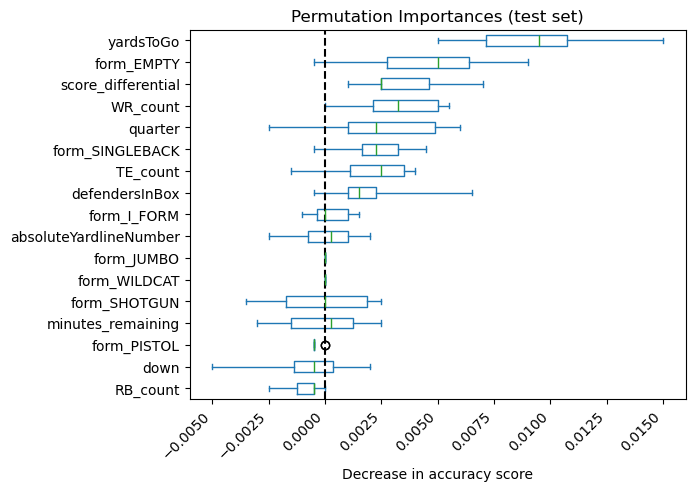

In [81]:
# https://scikit-learn.org/dev/auto_examples/inspection/plot_permutation_importance.html
from sklearn.inspection import permutation_importance

result = permutation_importance(
    grid_search_rf, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [82]:
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 11778
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  9993 non-null   int64  
 1   playId                  9993 non-null   int64  
 2   playDescription         9993 non-null   object 
 3   quarter                 9993 non-null   int64  
 4   down                    9993 non-null   int64  
 5   yardsToGo               9993 non-null   int64  
 6   DND                     9993 non-null   object 
 7   possessionTeam          9993 non-null   object 
 8   defensiveTeam           9993 non-null   object 
 9   yardlineSide            9993 non-null   object 
 10  yardlineNumber          9993 non-null   int64  
 11  gameClock               9993 non-null   object 
 12  preSnapHomeScore        9993 non-null   int64  
 13  preSnapVisitorScore     9993 non-null   int64  
 14  passResult              9993 non-null   obje

In [83]:
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]

}

nb_model = GaussianNB()

grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    cv=3, 
    scoring='accuracy', 
    verbose=1,
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'var_smoothing': 1.0}
Best Accuracy: 0.09206969633798902


In [84]:
nb_model = GaussianNB(var_smoothing=1.0)
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_pred_tr = nb_model.predict(X_train)

predicted_classes = label_encoder.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(
    y_test, y_pred, 
    labels=np.unique(y_test), 
    target_names=label_encoder.inverse_transform(np.unique(y_test))
))

dict['Naive Bayes'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_tr)]

Accuracy: 0.09904952476238119
Train Accuracy: 0.0960720540405304
Classification Report:
                precision    recall  f1-score   support

      Comeback       0.00      0.00      0.00        10
 Comeback-Flat       0.00      0.00      0.00         4
   Comeback-Go       0.00      0.00      0.00        36
   Comeback-In       0.00      0.00      0.00        14
  Comeback-Mid       0.00      0.00      0.00        13
  Comeback-Out       0.00      0.00      0.00         4
 Comeback-Post       0.00      0.00      0.00         8
Comeback-Wheel       0.00      0.00      0.00         6
        Corner       0.00      0.00      0.00        10
   Corner-Flat       0.00      0.00      0.00         9
     Corner-Go       0.00      0.00      0.00        68
     Corner-In       0.00      0.00      0.00         6
    Corner-Mid       0.00      0.00      0.00         6
    Corner-Out       0.00      0.00      0.00        12
   Corner-Post       0.00      0.00      0.00         3
  Corner-Slant 

/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_knn.fit(X_train, y_train)

print("Best parameters:", grid_knn.best_params_)
print("Best cross-validation score:", grid_knn.best_score_)

y_pred = grid_knn.predict(X_test)
y_pred_tr = grid_knn.predict(X_train)

predicted_classes = label_encoder.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(
    y_test, y_pred, 
    labels=np.unique(y_test), 
    target_names=label_encoder.inverse_transform(np.unique(y_test))
))

dict['k-Nearest Neighbors'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_tr)]

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.08218575282893485
Accuracy: 0.080040020010005
Train Accuracy: 0.21553665248936701
Classification Report:
                precision    recall  f1-score   support

      Comeback       0.00      0.00      0.00        10
 Comeback-Flat       0.00      0.00      0.00         4
   Comeback-Go       0.00      0.00      0.00        36
   Comeback-In       0.11      0.07      0.09        14
  Comeback-Mid       0.00      0.00      0.00        13
  Comeback-Out       0.00      0.00      0.00         4
 Comeback-Post       0.00      0.00      0.00         8
Comeback-Wheel       0.00      0.00      0.00         6
        Corner       0.00      0.00      0.00        10
   Corner-Flat       0.00      0.00      0.00         9
     Corner-Go       0.05      0.07      0.06        68
     Corner-In       0.00      0.00      0.00         6
    Corner-Mid       0.00      0.00      0.00        

/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincentetherton/anaconda3/envs/Regress/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [86]:
dict

{'Logistic Regression': [0.11705852926463231, 0.12634475856892668],
 'SVM': [0.11455727863931967, 0.11833875406554917],
 'Random Forests': [0.12206103051525763, 0.26344758568926696],
 'Naive Bayes': [0.09904952476238119, 0.0960720540405304],
 'k-Nearest Neighbors': [0.080040020010005, 0.21553665248936701]}

   Logistic Regression       SVM  Random Forests  Naive Bayes  \
0             0.117059  0.114557        0.122061     0.099050   
1             0.126345  0.118339        0.263448     0.096072   

   k-Nearest Neighbors  
0             0.080040  
1             0.215537  


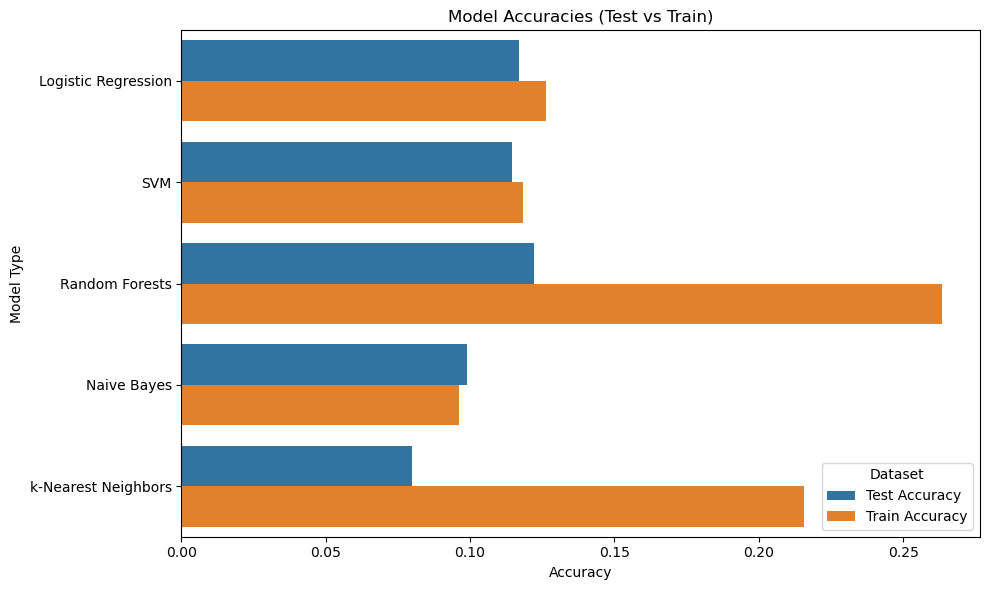

In [87]:
import seaborn as sns

df = pd.DataFrame(dict)

print(df.head())

df.index = ["Test Accuracy", "Train Accuracy"]

df_long = df.reset_index().melt(id_vars="index", var_name="Model", value_name="Accuracy")
df_long.rename(columns={"index": "Dataset"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    y="Model",
    x="Accuracy",
    hue="Dataset",
    orient="h"
)

plt.title("Model Accuracies (Test vs Train)")
plt.xlabel("Accuracy")
plt.ylabel("Model Type")
plt.legend(title="Dataset", loc="lower right")

plt.tight_layout()
plt.show()

In [88]:
routes_df.head()

,gameId,playId,nflId,bezier_curve,route,start_pos,final_pos,start_x,start_y,end_x,end_y,play_center
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel,"(-1.3500000000000014, 29.34)","(4.490000000000002, 45.71)",-1.35,29.34,4.49,45.71,20.57
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go,"(-1.9600000000000009, 36.77)","(12.049999999999995, 40.4)",-1.96,36.77,12.05,40.40,20.57
2,2021090900,97,39985.0,[ 0.00000000e+00 0.00000000e+00 1.69959402e-...,Flat,"(-5.450000000000003, 22.27)","(-4.740000000000002, 14.15)",-5.45,22.27,-4.74,14.15,20.57
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant,"(-0.990000000000002, 16.2)","(3.9200000000000017, 32.99)",-0.99,16.20,3.92,32.99,20.57
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post,"(-2.8400000000000034, 35.09)","(11.15, 20.49)",-2.84,35.09,11.15,20.49,20.57


In [89]:
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 11778
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  9993 non-null   int64  
 1   playId                  9993 non-null   int64  
 2   playDescription         9993 non-null   object 
 3   quarter                 9993 non-null   int64  
 4   down                    9993 non-null   int64  
 5   yardsToGo               9993 non-null   int64  
 6   DND                     9993 non-null   object 
 7   possessionTeam          9993 non-null   object 
 8   defensiveTeam           9993 non-null   object 
 9   yardlineSide            9993 non-null   object 
 10  yardlineNumber          9993 non-null   int64  
 11  gameClock               9993 non-null   object 
 12  preSnapHomeScore        9993 non-null   int64  
 13  preSnapVisitorScore     9993 non-null   int64  
 14  passResult              9993 non-null   obje

In [90]:
route_combos_df.head()

,gameId,playId,route_combo
0,2021090900,97,Go-Wheel
1,2021090900,97,Post-Slant
2,2021090900,137,Corner-Go
3,2021090900,137,Comeback-Go
4,2021090900,137,Comeback


In [91]:
wr_df.head()

,gameId,playId,nflId,bezier_curve,route,start_pos,final_pos,start_x,start_y,end_x,end_y,play_center
0,2021090900,97,35481.0,[ 0. -0. 0.10591385 -0.08...,Wheel,"(-1.3500000000000014, 29.34)","(4.490000000000002, 45.71)",-1.35,29.34,4.49,45.71,20.57
1,2021090900,97,35634.0,[ 0. -0. 0.1125704 -0.094082...,Go,"(-1.9600000000000009, 36.77)","(12.049999999999995, 40.4)",-1.96,36.77,12.05,40.40,20.57
3,2021090900,97,41233.0,[ 0. 0. 0.03139033 0.018729...,Slant,"(-0.990000000000002, 16.2)","(3.9200000000000017, 32.99)",-0.99,16.20,3.92,32.99,20.57
4,2021090900,97,44896.0,[ 0. 0. 0.11400586 0.169068...,Post,"(-2.8400000000000034, 35.09)","(11.15, 20.49)",-2.84,35.09,11.15,20.49,20.57
5,2021090900,137,42347.0,[ 0.00000000e+00 0.00000000e+00 1.93197947e-...,Go,"(-1.3700000000000043, 13.79)","(10.650000000000006, 8.83)",-1.37,13.79,10.65,8.83,36.61


In [92]:
route_dummies = pd.get_dummies(wr_df['route'], prefix='route')

route_features = pd.concat([wr_df[['gameId', 'playId']], route_dummies], axis=1)

play_routes = route_features.groupby(['gameId', 'playId']).max().reset_index()

play_routes.head()

,gameId,playId,route_Comeback,route_Corner,route_Flat,route_Go,route_In,route_Mid,route_Out,route_Post,route_Slant,route_Texas,route_Wheel
0,2021090900,97,False,False,False,True,False,False,False,True,True,False,True
1,2021090900,137,True,True,False,True,False,False,False,False,False,False,False
2,2021090900,187,True,False,False,True,True,False,False,False,False,False,False
3,2021090900,282,False,False,False,True,False,True,False,False,False,False,False
4,2021090900,349,False,False,False,True,False,True,False,False,True,False,False


In [93]:
route_combo_dummies = pd.get_dummies(route_combos_df['route_combo'], prefix='combo')

route_combo_features = pd.concat([route_combos_df[['gameId', 'playId']], route_combo_dummies], axis=1)

play_combos = route_combo_features.groupby(['gameId', 'playId']).max().reset_index()

play_combos.head()

,gameId,playId,combo_Comeback,combo_Comeback-Comeback,combo_Comeback-Corner,combo_Comeback-Flat,combo_Comeback-Go,combo_Comeback-In,combo_Comeback-Mid,combo_Comeback-Out,...,combo_Post-Slant,combo_Post-Texas,combo_Post-Wheel,combo_Slant,combo_Slant-Slant,combo_Slant-Wheel,combo_Texas,combo_Texas-Wheel,combo_Wheel,combo_Wheel-Wheel
0,2021090900,97,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2021090900,137,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021090900,187,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021090900,282,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021090900,349,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 11778
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  9993 non-null   int64  
 1   playId                  9993 non-null   int64  
 2   playDescription         9993 non-null   object 
 3   quarter                 9993 non-null   int64  
 4   down                    9993 non-null   int64  
 5   yardsToGo               9993 non-null   int64  
 6   DND                     9993 non-null   object 
 7   possessionTeam          9993 non-null   object 
 8   defensiveTeam           9993 non-null   object 
 9   yardlineSide            9993 non-null   object 
 10  yardlineNumber          9993 non-null   int64  
 11  gameClock               9993 non-null   object 
 12  preSnapHomeScore        9993 non-null   int64  
 13  preSnapVisitorScore     9993 non-null   int64  
 14  passResult              9993 non-null   obje

In [95]:
def extract_counts(personnel):
    counts = {'DL': 0, 'LB': 0, 'DB': 0}
    for part in personnel.split(', '):
        for key in counts.keys():
            if key in part:
                counts[key] = int(part.split()[0])
    return counts['DL'], counts['LB'], counts['DB']

plays_df[['DL_count', 'LB_count', 'DB_count']] = plays_df['personnelD'].apply(
    lambda x: pd.Series(extract_counts(x))
)

plays_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 11778
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  9993 non-null   int64  
 1   playId                  9993 non-null   int64  
 2   playDescription         9993 non-null   object 
 3   quarter                 9993 non-null   int64  
 4   down                    9993 non-null   int64  
 5   yardsToGo               9993 non-null   int64  
 6   DND                     9993 non-null   object 
 7   possessionTeam          9993 non-null   object 
 8   defensiveTeam           9993 non-null   object 
 9   yardlineSide            9993 non-null   object 
 10  yardlineNumber          9993 non-null   int64  
 11  gameClock               9993 non-null   object 
 12  preSnapHomeScore        9993 non-null   int64  
 13  preSnapVisitorScore     9993 non-null   int64  
 14  passResult              9993 non-null   obje

In [96]:
merged_df = play_routes.merge(route_combo_features, on=['gameId', 'playId'], how='left')

In [97]:
merged_df = merged_df.merge(
    plays_df[['gameId', 'playId', 'playResult']],
    on=['gameId', 'playId'],
    how='left'
)

merged_df = merged_df.groupby(['gameId', 'playId']).max().reset_index()

In [98]:
merged_df.head()

,gameId,playId,route_Comeback,route_Corner,route_Flat,route_Go,route_In,route_Mid,route_Out,route_Post,...,combo_Post-Texas,combo_Post-Wheel,combo_Slant,combo_Slant-Slant,combo_Slant-Wheel,combo_Texas,combo_Texas-Wheel,combo_Wheel,combo_Wheel-Wheel,playResult
0,2021090900,97,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0.0
1,2021090900,137,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,28.0
2,2021090900,187,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,5.0
3,2021090900,282,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0.0
4,2021090900,349,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0.0


In [99]:
merged_df = merged_df.merge(
    plays_df[['gameId', 'playId', 'DL_count', 'LB_count', 'DB_count', 'defendersInBox']],
    on=['gameId', 'playId'],
    how='left'
)

merged_df = merged_df.groupby(['gameId', 'playId']).max().reset_index()

In [100]:
merged_df.head()

,gameId,playId,route_Comeback,route_Corner,route_Flat,route_Go,route_In,route_Mid,route_Out,route_Post,...,combo_Slant-Wheel,combo_Texas,combo_Texas-Wheel,combo_Wheel,combo_Wheel-Wheel,playResult,DL_count,LB_count,DB_count,defendersInBox
0,2021090900,97,False,False,False,True,False,False,False,True,...,False,False,False,False,False,0.0,4.0,2.0,5.0,6.0
1,2021090900,137,True,True,False,True,False,False,False,False,...,False,False,False,False,False,28.0,4.0,4.0,3.0,6.0
2,2021090900,187,True,False,False,True,True,False,False,False,...,False,False,False,False,False,5.0,3.0,3.0,5.0,6.0
3,2021090900,282,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,4.0,3.0,4.0,6.0
4,2021090900,349,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,3.0,4.0,4.0,7.0


In [101]:
merged_df.head()

,gameId,playId,route_Comeback,route_Corner,route_Flat,route_Go,route_In,route_Mid,route_Out,route_Post,...,combo_Slant-Wheel,combo_Texas,combo_Texas-Wheel,combo_Wheel,combo_Wheel-Wheel,playResult,DL_count,LB_count,DB_count,defendersInBox
0,2021090900,97,False,False,False,True,False,False,False,True,...,False,False,False,False,False,0.0,4.0,2.0,5.0,6.0
1,2021090900,137,True,True,False,True,False,False,False,False,...,False,False,False,False,False,28.0,4.0,4.0,3.0,6.0
2,2021090900,187,True,False,False,True,True,False,False,False,...,False,False,False,False,False,5.0,3.0,3.0,5.0,6.0
3,2021090900,282,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,4.0,3.0,4.0,6.0
4,2021090900,349,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,3.0,4.0,4.0,7.0


In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   4819 non-null   int64  
 1   playId                   4819 non-null   int64  
 2   route_Comeback           4819 non-null   bool   
 3   route_Corner             4819 non-null   bool   
 4   route_Flat               4819 non-null   bool   
 5   route_Go                 4819 non-null   bool   
 6   route_In                 4819 non-null   bool   
 7   route_Mid                4819 non-null   bool   
 8   route_Out                4819 non-null   bool   
 9   route_Post               4819 non-null   bool   
 10  route_Slant              4819 non-null   bool   
 11  route_Texas              4819 non-null   bool   
 12  route_Wheel              4819 non-null   bool   
 13  combo_Comeback           4819 non-null   bool   
 14  combo_Comeback-Comeback 

In [103]:
merged_df = merged_df.dropna()

In [104]:
merged_df.head()

,gameId,playId,route_Comeback,route_Corner,route_Flat,route_Go,route_In,route_Mid,route_Out,route_Post,...,combo_Slant-Wheel,combo_Texas,combo_Texas-Wheel,combo_Wheel,combo_Wheel-Wheel,playResult,DL_count,LB_count,DB_count,defendersInBox
0,2021090900,97,False,False,False,True,False,False,False,True,...,False,False,False,False,False,0.0,4.0,2.0,5.0,6.0
1,2021090900,137,True,True,False,True,False,False,False,False,...,False,False,False,False,False,28.0,4.0,4.0,3.0,6.0
2,2021090900,187,True,False,False,True,True,False,False,False,...,False,False,False,False,False,5.0,3.0,3.0,5.0,6.0
3,2021090900,282,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,4.0,3.0,4.0,6.0
4,2021090900,349,False,False,False,True,False,True,False,False,...,False,False,False,False,False,0.0,3.0,4.0,4.0,7.0


In [105]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

columns=['gameId', 'playId', 'playResult']
columns += list(merged_df.filter(regex='^route').columns)


X = merged_df.drop(columns=columns)
y = merged_df['playResult']

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_cv.fit(X_train, y_train)

y_pred = ridge_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best alpha:", ridge_cv.best_params_)
print("Mean Squared Error (Test):", mse)

feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_cv.best_estimator_.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

Best alpha: {'alpha': 100.0}
Mean Squared Error (Test): 108.93733509199382
               Feature  Coefficient
23       combo_Flat-Go     0.413802
56      combo_Out-Post     0.410445
50      combo_Mid-Post     0.331025
61     combo_Post-Post     0.312913
30            combo_Go     0.307337
..                 ...          ...
19  combo_Corner-Slant    -0.350760
67   combo_Slant-Wheel    -0.357088
41        combo_In-Mid    -0.363841
51     combo_Mid-Slant    -0.375928
44      combo_In-Slant    -0.507140

[76 rows x 2 columns]


In [106]:
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(max_iter=10000)

lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

y_pred = lasso_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best alpha:", lasso_cv.best_params_)
print("Mean Squared Error (Test):", mse)

feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.best_estimator_.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

Best alpha: {'alpha': 0.1}
Mean Squared Error (Test): 107.4812423378381
               Feature  Coefficient
23       combo_Flat-Go     0.399273
31         combo_Go-Go     0.335661
56      combo_Out-Post     0.327566
30            combo_Go     0.281317
50      combo_Mid-Post     0.238861
..                 ...          ...
67   combo_Slant-Wheel    -0.217659
41        combo_In-Mid    -0.237175
19  combo_Corner-Slant    -0.240866
51     combo_Mid-Slant    -0.269244
44      combo_In-Slant    -0.398801

[76 rows x 2 columns]


We've demonstrated that with some degree of confidence, we can predict the route combinations involved in a play during a specific game scenario, and I anticipate with more features we'd be able to increase this level of confidence.

In the second part of this notebook, we demonstrated using regression to determine coefficients of route combinations and how they contribute to play success. The highest coefficient route combinations contribute most positively to plays run while negative coefficients signify the opposite. For future work, we can work to refine what determines play success rather than just using a proxy, namely yards gained on a play. There are plenty of situations (penalties on the defense or athletic plays from recievers) that can gain yards without it being a successful route combination.